# About

About Dataset
Concerns housing values in suburbs of Boston.

Number of Instances: 506
Number of Attributes: 13 continuous attributes (including "class"
attribute "MEDV"), 1 binary-valued attribute.
Attribute Information:

    CRIM per capita crime rate by town

    ZN -proportion of residential land zoned for lots over 25,000 sq.ft.

    INDUS -proportion of non-retail business acres per town

    CHAS -Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

    NOX -nitric oxides concentration (parts per 10 million)

    RM -average number of rooms per dwelling

    AGE -proportion of owner-occupied units built prior to 1940

    DIS -weighted distances to five Boston employment centres
    
    RAD -index of accessibility to radial highways
    
    TAX -full-value property-tax rate per 10,000 dollars
    
    PTRATIO - pupil-teacher ratio by town 
    
    B -1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    
    LSTAT -% lower status of the population
    
    MEDV -Median value of owner-occupied homes in 1000's dollars
    
Missing Attribute Values: None.

# Hypothesis

 Let's consider development of world and constantly increasing average quality of life as axiom. Then let's state that the better surroundings of the house the more valuable it is. For some people it's also important to be close to the centre of the city, so we will consider it as an argument for price increase too. What is important too is age of the house, as communications tear over time, its logical for new houses to be more developed overall rather than olds ones, so, consequently, more valuable too.

So, putting it all in one let's state the hypothethis: house is more valuable if it has good accessibility to city centre, a lot of rooms, is of moderate age, has good surroundings.

 Further let's observe the dataset and *prove* or *refute* that hypothesis

# Overall description

In [206]:
import pandas as pd

<IPython.core.display.Javascript object>

In [207]:
from numpy import *

<IPython.core.display.Javascript object>

In [208]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [209]:
data = pd.read_csv("data.csv")
data1 = pd.read_csv("data.csv")

<IPython.core.display.Javascript object>

In [210]:
def round1(x=1):
    if round(x) % 2:
        return round(x)
    else:
        return 1 + round(x) if 1 + round(x) - x < x - round(x) + 1 else round(x) - 1

<IPython.core.display.Javascript object>

In [211]:
def round2(x=0):
    if round(x) % 2:
        return 1 + round(x) if 1 + round(x) - x < x - round(x) + 1 else round(x) - 1
    else:
        return round(x)

<IPython.core.display.Javascript object>

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


<IPython.core.display.Javascript object>

In [213]:
meanRM = 7

<IPython.core.display.Javascript object>

Modify some values and remove NaNs for further plotting:

In [214]:
print(
    "before rounding: \n",
    data[["DIS", "B", "RM", "NOX", "PTRATIO", "AGE", "RAD"]],
    "\n\n",
    sep="\n",
)
for index, row in data.iterrows():
    data.at[index, "DIS"] = round1(row["DIS"])
    data.at[index, "B"] = 100 * round(row["B"] / 100)
    data.at[index, "RM"] = round(row["RM"]) if not isnan(row["RM"]) else meanRM
    data.at[index, "NOX"] = round2(10 * row["NOX"]) / 10
    data.at[index, "PTRATIO"] = round1(row["PTRATIO"])
    data.at[index, "AGE"] = 10 * round1(row["AGE"] / 10)
    data.at[index, "RAD"] = round1(row["RAD"])
for index, row in data1.iterrows():
    data1.at[index, "RM"] = row["RM"] if not isnan(row["RM"]) else meanRM
print(
    "after rounding: \n",
    data[["DIS", "B", "RM", "NOX", "PTRATIO", "AGE", "RAD"]],
    sep="\n",
)

before rounding: 

        DIS       B     RM    NOX  PTRATIO   AGE  RAD
0    4.0900  396.90  6.575  0.538     15.3  65.2    1
1    4.9671  396.90  6.421  0.469     17.8  78.9    2
2    4.9671  392.83  7.185  0.469     17.8  61.1    2
3    6.0622  394.63  6.998  0.458     18.7  45.8    3
4    6.0622  396.90  7.147  0.458     18.7  54.2    3
..      ...     ...    ...    ...      ...   ...  ...
506  2.0980  396.00  6.980  0.561     23.0  89.0    3
507  2.6540  343.00  6.980  0.561     23.0  76.0    3
508  2.9870  343.00  6.123  0.561     23.0  98.0    3
509  2.5430  343.00  6.222  0.561     23.0  34.0    3
510  2.9870  321.00  6.760  0.561     23.0  67.0    3

[511 rows x 7 columns]



after rounding: 

     DIS      B   RM  NOX  PTRATIO   AGE  RAD
0    5.0  400.0  7.0  0.6     15.0  70.0    1
1    5.0  400.0  6.0  0.4     17.0  70.0    1
2    5.0  400.0  7.0  0.4     17.0  70.0    1
3    7.0  400.0  7.0  0.4     19.0  50.0    3
4    7.0  400.0  7.0  0.4     19.0  50.0    3
..   ...    

<IPython.core.display.Javascript object>

$data$ was opimized for hist plotting and $data1$ is raw data with just removed NaNs

In [215]:
data1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


<IPython.core.display.Javascript object>

In [216]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.6,7.0,70.0,5.0,1,296,15.0,400.0,4.98,24.0
1,0.02731,0.0,7.07,0,0.4,6.0,70.0,5.0,1,242,17.0,400.0,9.14,21.6
2,0.02729,0.0,7.07,0,0.4,7.0,70.0,5.0,1,242,17.0,400.0,4.03,34.7
3,0.03237,0.0,2.18,0,0.4,7.0,50.0,7.0,3,222,19.0,400.0,2.94,33.4
4,0.06905,0.0,2.18,0,0.4,7.0,50.0,7.0,3,222,19.0,400.0,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.6,7.0,90.0,3.0,3,320,23.0,400.0,12.00,12.0
507,0.23456,0.0,12.50,0,0.6,7.0,70.0,3.0,3,320,23.0,300.0,25.00,32.0
508,0.44433,0.0,12.50,0,0.6,6.0,90.0,3.0,3,320,23.0,300.0,21.00,54.0
509,0.77763,0.0,12.70,0,0.6,6.0,30.0,3.0,3,329,23.0,300.0,76.00,67.0


<IPython.core.display.Javascript object>

In [217]:
data1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.294560,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703852,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.887500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.211000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.635000,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


<IPython.core.display.Javascript object>

# Graphical analysis of data

In [218]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [219]:
import seaborn as sns

<IPython.core.display.Javascript object>

In [220]:
import plotly.express as px

<IPython.core.display.Javascript object>

all plots to visualize data and formulate hypothesis:

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

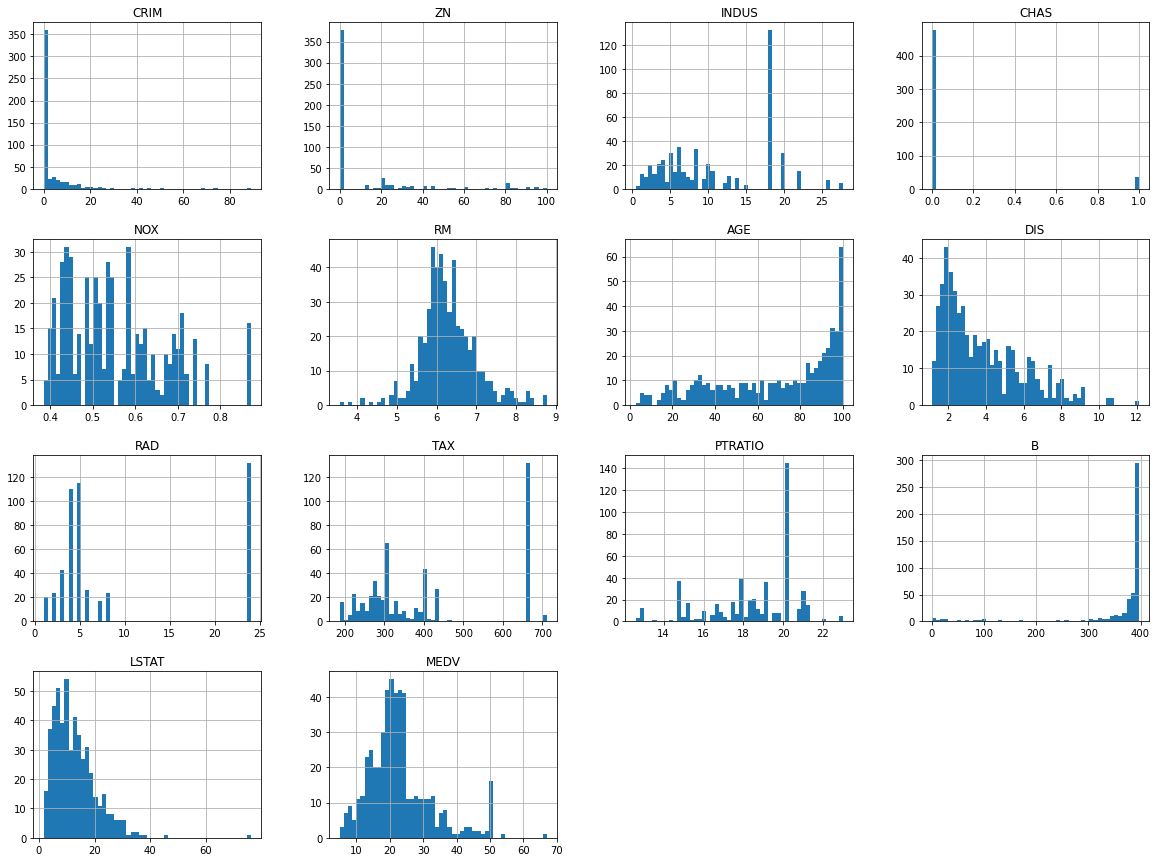

<IPython.core.display.Javascript object>

In [221]:
data1.hist(bins=50, figsize=(20, 15))

pairwise plots for more precise overview:

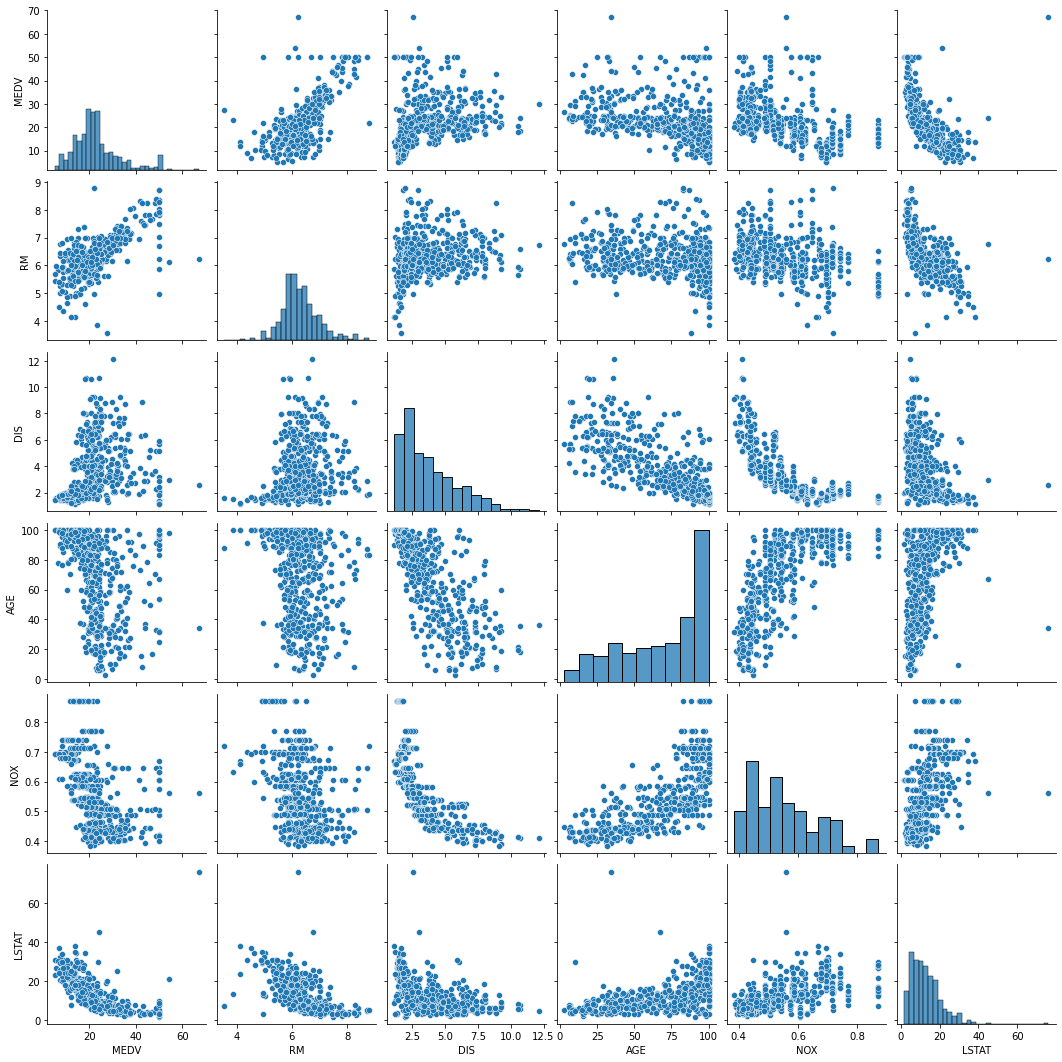

<IPython.core.display.Javascript object>

In [222]:
sns.pairplot(data1[["MEDV", "RM", "DIS", "AGE", "NOX", "LSTAT"]])

#### below graph describes the distribution structure of the house value in 1,000 USD from their distance to the city center, from which we can conclude that on average closest to the centre houses are rather extremeley low priced or high priced

In [223]:
px.histogram(
    data[["MEDV", "DIS"]],
    x="MEDV",
    color="DIS",
    marginal="box",
    title="DIS over MEDV",
    height=800,
)

<IPython.core.display.Javascript object>

#### below graph shows dependancy of number of rooms on price of house, from which we can conclude that on average the more house is expensive, the more rooms it has

In [224]:
px.histogram(
    data[["MEDV", "RM"]],
    x="MEDV",
    color="RM",
    marginal="box",
    title="RM over MEDV",
    height=800,
)

<IPython.core.display.Javascript object>

#### below graph shows dependancy of nitric oxides concentration on price of house, from which we can conclude that on average the more house is expensive, the cleaner the air around it

In [225]:
px.histogram(
    data[["MEDV", "NOX"]],
    x="MEDV",
    color="NOX",
    marginal="box",
    title="NOX over MEDV",
    height=700,
)

<IPython.core.display.Javascript object>

#### below graph shows dependency of pupil rate in town on price of house, from which we can conclude that there is no determined dependency between these two values

In [226]:
px.histogram(
    data[["MEDV", "PTRATIO"]],
    x="MEDV",
    color="PTRATIO",
    marginal="box",
    title="PTRATIO over MEDV",
    height=800,
)

<IPython.core.display.Javascript object>

#### below graph shows dependency of age of house on its price, from which we can conclude that on average old houses are rather extremely cheap or expensive, while the age of average priced house varies from 10 to 90 years in almost equal proportions

In [227]:
px.histogram(
    data[["MEDV", "AGE"]],
    x="MEDV",
    color="AGE",
    marginal="box",
    title="AGE over MEDV",
    height=700,
)

<IPython.core.display.Javascript object>

#### below graph shows dependancy of railway accessibility on price, from which we can conclude that RAD doesn't matter much for both expensive and cheap houses, while for the average priced houses plays a role

In [228]:
px.histogram(
    data[["MEDV", "RAD"]],
    x="MEDV",
    color="RAD",
    marginal="box",
    title="RAD over MEDV",
    height=700,
)

<IPython.core.display.Javascript object>

#### below graph shows dependancy of age of house on number of rooms in it, from which we can conclude that 90% of houses have 6-7 rooms, that old houses on average tend to have less rooms than new and that houses with the smallest amount of room are almost all old, from all of the stated above we can state that average house has more rooms over time

In [229]:
px.histogram(data[["AGE", "RM"]], x="RM", color="AGE", title="AGE over RM", height=700)

<IPython.core.display.Javascript object>

#### below graph shows dependency of nitric oxides concentration of distance in it, from which we can conclude that on 

In [230]:
px.histogram(
    data[["NOX", "DIS"]],
    x="DIS",
    color="NOX",
    marginal="box",
    title="NOX over DIS",
    height=700,
)

<IPython.core.display.Javascript object>

# Linear regressions

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

let's write a function for plotting a regression

In [232]:
def plot_linear_regression(x, y, data, ttpe="lowess", ttle=""):
    x_train, x_test, y_train, y_test = train_test_split(
        data[[x]], data[y], test_size=0.3, random_state=100
    )
    # splitting the dataset for training and testing
    slr = LinearRegression()
    slr.fit(x_train, y_train)
    # fitting the model
    # print("Intercept: ", slr.intercept_)
    # print("Coefficient: ", slr.coef_)
    y_pred_slr = slr.predict(x_test)
    # print(y_pred_slr)
    # prediction
    df = pd.concat(
        [
            x_test,
            y_test,
            pd.DataFrame(data=map(lambda x: [x], y_pred_slr), columns=["y_pred"]),
        ],
        axis=1,
        join="inner",
    )
    return px.scatter(
        df,
        x=x,
        y=y,
        trendline=ttpe,
        trendline_color_override="Red",
        title=ttle,
        marginal_y="box",
        marginal_x="violin",
        height=750,
    ).show()

<IPython.core.display.Javascript object>

UPD: over time I found better alternative to sklearn

### dependency of railway accessibility on price graph, from which we can conclude that the more house expensive, the less railway accessibility is important to it. It may be because wealthy people on average prefer personal transport rather than public.

In [233]:
plot_linear_regression("MEDV", "RAD", data1, "ols", "RAD over MEDV")

<IPython.core.display.Javascript object>

### dependency of room number on price graph, from which we can conclude that with good precision the more house is expensive, the more rooms it has. It may be so as wealthy people prefer bigger houses with more rooms as they can afford them, and consequently, expensive houses is built with more rooms than average houses.

In [234]:
plot_linear_regression("MEDV", "RM", data1, "ols", "RM over MEDV")

<IPython.core.display.Javascript object>

### dependency of age of house on its price graph, from which we can conclude that that on average the newer the house, the more expensive it is. However, there are a lot of deviations from a trendline, so some exceptions should be considered. It may be caused by many effects, but on my sight the main are that old expensive houses can be a historical legacy and cheap houses may be a consequence of tradeoff of location and price, so that better location is preferred rather than quality of communications.

In [235]:
plot_linear_regression("MEDV", "AGE", data1, "ols", "AGE over MEDV")

<IPython.core.display.Javascript object>

### nitric oxides concentration over price graph, from which we can conclude that better the air surrounds the house the more the valuable the house. Well, that was actually obvious from the very beginning, but we proved it statistically, so that now we can be sure that it is so.

In [236]:
plot_linear_regression("MEDV", "NOX", data1, "ols", "NOX over MEDV")

<IPython.core.display.Javascript object>

### distance to city centre over price graph, from which we can conclude that on average the more house is distanced from the city, the more valuable it is. Such a conclusion is actually quite contradictionary for me, but, well, statistics knows better. It may be so as people prefer to be further from the city to unite with nature and relax from urban hustle and bustle, as they anyway visit it almost every day for work.

In [237]:
plot_linear_regression("MEDV", "DIS", data1, "ols", "DIS over MEDV")

<IPython.core.display.Javascript object>

In [238]:
plot_linear_regression("DIS", "NOX", data1, "ols", "NOX over DIS")

<IPython.core.display.Javascript object>

# Conclusion

Well, as we can see above, most of my statements were confirmed, although, there are some that were refuted. Let's state them further:

*The house is more valuable if it is distanced from city centre, has good clean air in its surroundings, a lot of rooms and in average of moderate age*

As we can see on the graphs, the air condisitons near house gets better as house is more distanced from the city, so that we can say that ecology is more important to people, rather than time to get to work. What comes to age, maybe, as I stated before, people tradeoff communications quality to better location, or for expensive houses live in historical legacy and doesn't want to move out for personal reasons.